In [20]:
import numpy as np
import math, copy
import matplotlib.pyplot as plt 

In [8]:
def plot_areas(x, y, ax):
    """
    Input:
        x: NdArray with shape (N,2)
        y: NDArray with shape (N,1)
    
    Output:
        Plots x[0] in x asis and x[y] in y asis. Plots y corresponding to each value.
        
    """
    scale_false = lambda t: 50 if (t == 0) else 0
    scale_true  = lambda t: 50 if (t == 1) else 0
    color = lambda t: "r" if (t == 0) else "b"
    
    area1 = np.array([scale_false(yi) for yi in y])
    area2 = np.array([scale_true(yi) for yi in y])
    colors = np.array([color(yi) for yi in y])
    ax.scatter(x[:,0], x[:,1], area1,marker='x',c=colors, label="Y=0")
    ax.scatter(x[:,0], x[:,1], area2,marker='o',c=colors, label="Y=1")

In [9]:
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

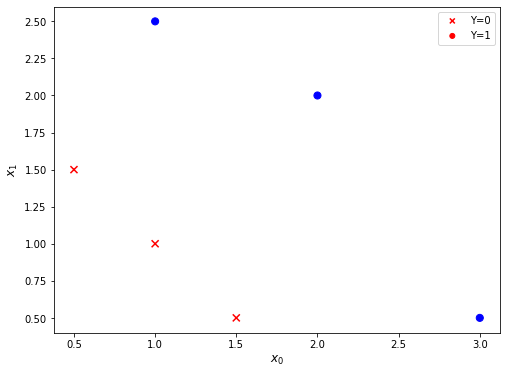

In [10]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
plot_areas(x_train, y_train, ax)
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend()
plt.show()

In [13]:
def sigmoid_single(zi):
    """
    Input: 
        zi : scalar value 
    Output: 
        sigmoid function applied to zi
    """
    return 1 / (1 + math.exp(-zi))
    

def calculate_cost(x,y,w,b):
    """
    Input:
        x : NDArray(m,n) - m is number of training set, n is numer of features.
        y : NDArray(m,1) - output value for m examples.
        w : Parameters
        b : bias
    
    Output:
        Cost
    """
    m,n = x.shape
    loss = 0.0
    for i in range(m):
        zi = np.dot(x[i], w) + b
        gzi = sigmoid_single(zi)
        loss = loss + y[i]*np.log(gzi) + (1 - y[i])*np.log(1 - gzi)
    
    return -loss/m

Recall the gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$  

In [14]:
def gradient_logistic(x, y, w, b):
    """
    Args:
        x (ndarray(m,n)) : m is the number of training set, n is number of features.
        y (ndarray(m,))  : Target values
        w (ndarray(n,))  : Model Parameters
        b Scaler.        : Model parameter - b
    return:
        dj_dw (ndarray(n,)) : Gradient of cost w.r.t. parameters w
        dj_db scalar.       : Gradient of cost w.r.t. parameter b        
    """
    m, n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0
    
    for i in range(m):
        f_w_b = sigmoid_single(np.dot(x[i], w) + b)
        dj_db = dj_db + (f_w_b - y[i])
        for j in range(n):
           dj_dw[j] = dj_dw[j] + (f_w_b - y[i])*x[i][j]
    
    return dj_dw/m , dj_db/m
    

In [15]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: [0.49833339 0.49883943]
dj_dw: 0.49861806546328574


In [23]:
def gradient_descent_logistic(x, y, w_in, b_in, alpha, iters):
    """
    Args:
        x (ndarray(m,n)) : m is the number of training set, n is number of features.
        y (ndarray(m,))  : Target values
        w (ndarray(n,))  : Model Parameters - Initial value
        b Scaler.        : Model parameter - b - Initial value
        alpha scalar     : Learning rate
        iter int.        : number of iterations
    return:
        w                : converged model parameters
        b                : Converged model parameter
        j_history        : Cost history with every iteration
    """
    
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(iters):
        dw, db = gradient_logistic(x,y,w,b)
        
        w = w - (alpha * dw)
        b = b - (alpha * db)
        cost = calculate_cost(x, y, w, b)
        J_history.append(cost)
        
        if i % 1000 == 0:
            print(f'Iteration - {i} cost is {cost}')
        
    return w, b,J_history
        

In [24]:
w_tmp  = np.zeros_like(x_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent_logistic(x_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration - 0 cost is 0.684610468560574
Iteration - 1000 cost is 0.1590977666870457
Iteration - 2000 cost is 0.08460064176930078
Iteration - 3000 cost is 0.05705327279402531
Iteration - 4000 cost is 0.04290759421682
Iteration - 5000 cost is 0.03433847729884557
Iteration - 6000 cost is 0.02860379802212006
Iteration - 7000 cost is 0.02450156960879306
Iteration - 8000 cost is 0.02142370332569295
Iteration - 9000 cost is 0.019030137124109114

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


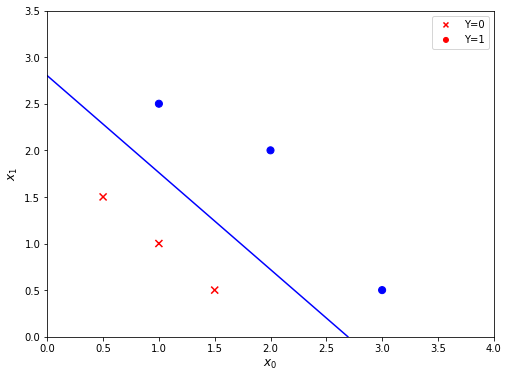

In [26]:
x0 = -b_out / w_out[0]
x1 = -b_out / w_out[1]

fig,ax = plt.subplots(1,1,figsize=(8,6))
plot_areas(x_train, y_train, ax)
ax.axis([0, 4, 0, 3.5])
ax.plot([0, x0], [x1, 0], color="b")
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend()
plt.show()
